In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt



In [18]:
dataset = pd.read_csv('Desktop/Salary_Data.csv')
print(dataset.shape)
dataset.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


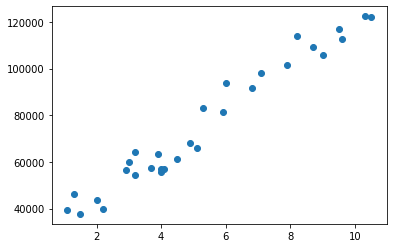

In [20]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])

In [22]:
np.corrcoef(dataset['YearsExperience'],dataset['Salary'])[0,1]

0.9782416184887599

In [23]:
dataset['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

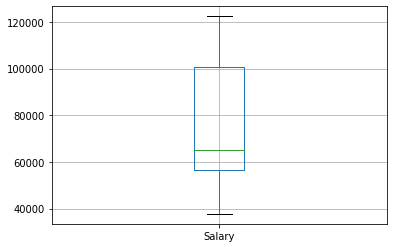

In [24]:
dataset.boxplot(column = 'Salary')

In [25]:
X = dataset['YearsExperience'].values
Y = dataset['Salary'].values

In [37]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
    
b1 = numer/denom

b0 = mean_y-(b1*mean_x)

print(b0,b1)

25792.20019866869 9449.962321455077


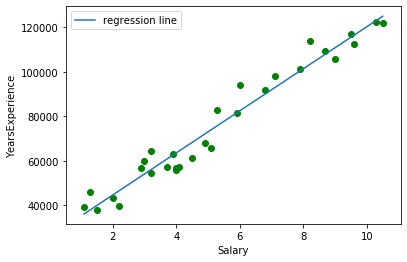

In [40]:
y_pred = b0 + b1 * X
plt.plot(X,y_pred,label='regression line')
plt.scatter(X,Y,c='green')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.legend()
plt.show()

In [41]:
#cost function

mse=0
for i in range(n):
    y_pred = b0 + b1*X[i]
    mse += (Y[i]-y_pred)**2
rmse = np.sqrt(mse/n)
print(rmse)

5592.043608760662


In [43]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_t += (Y[i]-y_pred)**2
    
r2 = 1-(ss_r/ss_t)
print(r2)

1.0


In [46]:
new_x = 10
y_new_pred = b0 +b1*new_x
y_new_pred

120291.82341321948

### Using Ski-kit

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
X = X.reshape((n,1))

model = LinearRegression()
model = model.fit(X,Y)
y_pred = model.predict(X)

In [55]:
model.score(X,Y)

0.9569566641435084

In [56]:
mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

5592.043608760662

In [57]:
model.predict([[10]])

array([120291.82341322])